##URBAN IMAGE SEGMENTATION
##Introduction

La crescente disponibilità di grandi volumi di immagini satellitari provenienti da varie missioni e modalità costituisce attualmente un catalizzatore per la realizzazione di studi su larga scala geografica e temporale.
In questo senso, la segmentazione delle immagini è un processo fondamentale nel campo della visione artificiale con la disponibilità di tante immagini, responsabile della divisione di un'immagine in diverse regioni o segmenti con caratteristiche simili. Questi segmenti possono rappresentare oggetti, trame o qualsiasi altra parte significativa dell'immagine. Eseguendo questa divisione, cerchiamo di comprendere meglio la struttura e il contenuto dell'immagine, il che facilita compiti come il riconoscimento di modelli, il rilevamento di oggetti e il tracciamento del movimento. Esistono diversi concetti importanti di base in relazione alla segmentazione delle immagini. Uno di questi è la soglia, che consiste nel dividere l'immagine in regioni in base a una soglia predefinita. Ad esempio, se vogliamo segmentare un'immagine in bianco e nero, possiamo impostare una soglia per separare i pixel scuri da quelli chiari. Un altro concetto è il rilevamento dei bordi, che prevede l'identificazione dei punti dell'immagine in cui si verificano improvvisi cambiamenti di intensità o colore. Rilevando questi bordi, possiamo separare gli oggetti e definire confini chiari tra le diverse parti dell'immagine.
In generale abbiamo diversi meccanismi per affrontare la segmentazione delle immagini, e questo dipende dall'obiettivo che vogliamo affrontare.  
Questo lavoro sarà svolto sulla base di una precedente ricerca che riguarda la segmentazione delle immagini aeree, reperibile al seguente link https://www.kaggle.com/datasets/aletbm/urban-segmentation-isprs/data

##Problem

L'aspetto molto eterogeneo di oggetti come edifici, strade, alberi e automobili nei dati ad altissima risoluzione porta ad un'elevata variazione delle classi da identificare in un'immagine. L'attenzione si concentra sulla segmentazione semantica 2D dettagliata che assegna etichette a più categorie di oggetti.

A tal fine, gli autori forniscono due set di dati di immagini aeree all’avanguardia, costituiti da mosaici fotografici treue ortho (TOP) ad altissima risoluzione. Entrambe le aree coprono scene urbane. Mentre Vaihingen è una città relativamente piccola con molti edifici indipendenti e piccoli edifici a più piani, Potsdam mostra una tipica città storica con grandi blocchi di edifici, strade strette e una fitta struttura insediativa.

Verrà effettuata una ricerca per modelli implementati simili alla ricerca, che saranno discussi in questo lavoro. In questo caso, non è disponibile un codice originale per l'analisi, quindi verrà implementato un codice per risolvere il problema.

Las imagenes pertenecen a las ciudades de Toronto, Potsdam y Vaihigen. El conjunto pertenciente a las imagenes de Toronto no se encuentran las mask correspondientes que serian las salidas de la red neuronal.

##Objective

L'obiettivo di questo lavoro è l'estrazione automatizzata di oggetti urbani da dati acquisiti da sensori aerei.

En siguiente codigo cargamos el contenido en drive, e importamos el Token personal de KAGGLE.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
files.upload()


Mounted at /content/drive


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elkasegura","key":"dd23b8e7d8e53a5fd8739fcfd6cb0927"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


A continuacion se descarga el dataset Urban Segmentation que contiene la imagenes con su correspondiente mask.

In [5]:
!kaggle datasets download -d aletbm/urban-segmentation-isprs

Dataset URL: https://www.kaggle.com/datasets/aletbm/urban-segmentation-isprs
License(s): other
100% 6.40G/6.40G [07:03<00:00, 14.9MB/s]
100% 6.40G/6.40G [07:03<00:00, 16.2MB/s]


In [6]:
!unzip -qq urban-segmentation-isprs.zip

En el siguiente codigo mostramos de ejemplo una imagen con su respectiva mask. Como se puede evidenciar las dimensiones de las imagenes son 6000x6000 RGB.
Este código importa la biblioteca imageio para leer dos archivos TIFF: una imagen y su correspondiente máscara de etiquetas. Utiliza matplotlib.pyplot para mostrar estas imágenes en una figura con dos subtramas. Se leen y se imprimen las dimensiones de ambas imágenes, luego se crean dos subtramas en una figura, se muestran la imagen original y la máscara, y se desactivan los ejes para una visualización más clara. Finalmente, se ajusta el espacio entre las subtramas y se muestra la figura.


*Questo codice importa la libreria imageio per leggere due file TIFF: un'immagine e la sua maschera di etichette corrispondente. Utilizza matplotlib.pyplot per visualizzare queste immagini in una figura con due sottotrame. Vengono lette e stampate le dimensioni di entrambe le immagini, quindi vengono create due sottotrame in una figura, vengono visualizzate l'immagine originale e la maschera, e vengono disattivati gli assi per una visualizzazione più chiara. Infine, viene regolato lo spazio tra le sottotrame e viene mostrata la figura*.

<ipython-input-8-62441e7d9531>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen_tif = imageio.imread(ruta_imagen_tif)
<ipython-input-8-62441e7d9531>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  labels_tif = imageio.imread(ruta_labels_tif)


Dimensiones de la imagen TIFF: (6000, 6000, 3)
Dimensiones de la imagen label TIFF: (6000, 6000, 3)


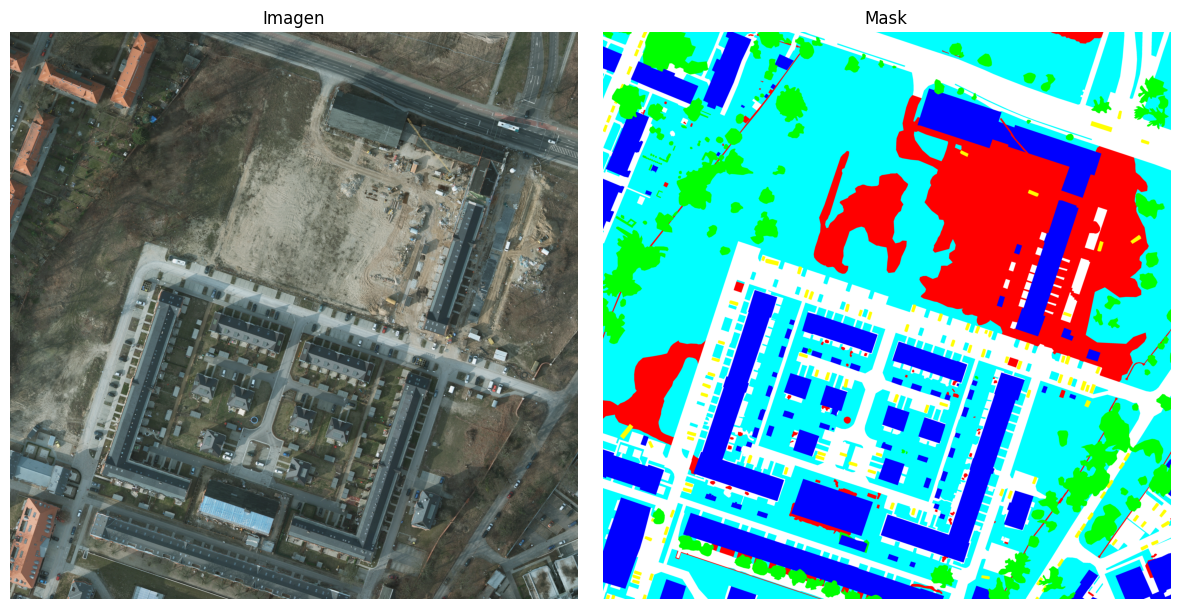

In [8]:
import imageio
ruta_imagen_tif = "/content/Potsdam/Images/top_potsdam_2_10_RGB.tif"
ruta_labels_tif = "/content/Potsdam/Labels/top_potsdam_2_10_label.tif"
import matplotlib.pyplot as plt

# Leer la imagen TIFF
imagen_tif = imageio.imread(ruta_imagen_tif)
labels_tif = imageio.imread(ruta_labels_tif)

# Verificar las dimensiones de la imagen
print("Dimensiones de la imagen TIFF:", imagen_tif.shape)
print("Dimensiones de la imagen label TIFF:", labels_tif.shape)

# Crear una figura y ejes para las subtramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar la imagen
axs[0].imshow(imagen_tif)
axs[0].set_title('Imagen')

# Mostrar la imagen de etiquetas
axs[1].imshow(labels_tif)
axs[1].set_title('Mask')

# Desactivar los ejes
for ax in axs:
    ax.axis('off')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [9]:
import plotly.express as px
fig = px.imshow(labels_tif.squeeze())
fig.show()

Cargaremos las imagenes de forma organizada las imagenes y las mascaras, pero en este caso como las imagenes presenta dimensiones grandes y al redimensionarla perderemos informacion en este caso lo que haremos es realizar parches de tamano 256x256 para tambien asi lograr mas imagenes y no perder informacion.

Este código procesa imágenes y etiquetas en formato TIFF de dos directorios diferentes. Crea parches de tamaño 256x256 píxeles y los guarda como archivos JPEG y PNG en directorios de salida especificados. Primero, verifica y crea los directorios de salida si no existen. Luego, para cada imagen y su etiqueta correspondiente, extrae parches y los guarda en el formato adecuado, imprimiendo mensajes de confirmación.

*Questo codice elabora immagini e etichette in formato TIFF da due directory differenti. Crea patch di dimensioni 256x256 pixel e le salva come file JPEG e PNG nelle directory di output specificate. Innanzitutto, verifica e crea le directory di output se non esistono. Successivamente, per ogni immagine e la sua etichetta corrispondente, estrae patch e le salva nel formato adeguato, stampando messaggi di conferma.*

In [10]:
from PIL import Image
import os

# Directorios de imágenes y etiquetas
directorio_imagenes = ["/content/Potsdam/Images", "/content/Vaihingen/Images"]
directorio_etiquetas = ["/content/Potsdam/Labels", "/content/Vaihingen/Labels"]

# Directorio donde se guardarán las imágenes JPEG
directorio_salida_imagenes = os.path.join("/content", "ImagenR", "Imagenes")
directorio_salida_etiquetas = os.path.join("/content", "ImagenR", "Mask")

# Si los directorios de salida no existen, créalos
if not os.path.exists(directorio_salida_imagenes):
    os.makedirs(directorio_salida_imagenes)

if not os.path.exists(directorio_salida_etiquetas):
    os.makedirs(directorio_salida_etiquetas)

# Función para realizar parches y guardarlos como JPEG
def guardar_patches(imagen, etiqueta, nombre_archivo, directorio_salida_imagenes, directorio_salida_etiquetas, tamano_patch=(256, 256)):
    ancho, alto = imagen.size
    patch_width, patch_height = tamano_patch

    num_patches_x = ancho // patch_width
    num_patches_y = alto // patch_height

    for i in range(num_patches_x):
        for j in range(num_patches_y):
            # Coordenadas para el parche
            left = i * patch_width
            upper = j * patch_height
            right = left + patch_width
            lower = upper + patch_height

            # Extraer el parche de la imagen y la etiqueta
            parche_imagen = imagen.crop((left, upper, right, lower))
            parche_etiqueta = etiqueta.crop((left, upper, right, lower))

            # Guardar el parche como JPEG y PNG
            ruta_imagen_jpg = os.path.join(directorio_salida_imagenes, f"{nombre_archivo}_patch_{i}_{j}.jpg")
            ruta_etiqueta_png = os.path.join(directorio_salida_etiquetas, f"{nombre_archivo}_patch_{i}_{j}.png")

            parche_imagen.save(ruta_imagen_jpg, "JPEG")
            parche_etiqueta.save(ruta_etiqueta_png, "PNG")

            print(f"Parche guardado como {ruta_imagen_jpg}")
            print(f"Parche guardado como {ruta_etiqueta_png}")

# Iterar sobre los directorios de imágenes y etiquetas
for dir_imagenes, dir_etiquetas in zip(directorio_imagenes, directorio_etiquetas):
    # Obtener la lista de archivos en los directorios
    archivos_imagenes = sorted([os.path.join(dir_imagenes, archivo) for archivo in os.listdir(dir_imagenes) if archivo.endswith('.tif')])
    archivos_etiquetas = sorted([os.path.join(dir_etiquetas, archivo) for archivo in os.listdir(dir_etiquetas) if archivo.endswith('.tif')])

   # Iterar sobre los archivos de imágenes y etiquetas
    for ruta_imagen_tif, ruta_etiqueta_tif in zip(archivos_imagenes, archivos_etiquetas):
        # Cargar la imagen TIFF
        imagen_tif = Image.open(ruta_imagen_tif)
        etiqueta_tif = Image.open(ruta_etiqueta_tif)

        # Obtener el nombre del archivo sin la extensión
        nombre_archivo = os.path.splitext(os.path.basename(ruta_imagen_tif))[0]

        # Crear y guardar los parches
        guardar_patches(imagen_tif, etiqueta_tif, nombre_archivo, directorio_salida_imagenes, directorio_salida_etiquetas)

Streaming output truncated to the last 5000 lines.
Parche guardado como /content/ImagenR/Imagenes/top_potsdam_7_9_RGB_patch_12_7.jpg
Parche guardado como /content/ImagenR/Mask/top_potsdam_7_9_RGB_patch_12_7.png
Parche guardado como /content/ImagenR/Imagenes/top_potsdam_7_9_RGB_patch_12_8.jpg
Parche guardado como /content/ImagenR/Mask/top_potsdam_7_9_RGB_patch_12_8.png
Parche guardado como /content/ImagenR/Imagenes/top_potsdam_7_9_RGB_patch_12_9.jpg
Parche guardado como /content/ImagenR/Mask/top_potsdam_7_9_RGB_patch_12_9.png
Parche guardado como /content/ImagenR/Imagenes/top_potsdam_7_9_RGB_patch_12_10.jpg
Parche guardado como /content/ImagenR/Mask/top_potsdam_7_9_RGB_patch_12_10.png
Parche guardado como /content/ImagenR/Imagenes/top_potsdam_7_9_RGB_patch_12_11.jpg
Parche guardado como /content/ImagenR/Mask/top_potsdam_7_9_RGB_patch_12_11.png
Parche guardado como /content/ImagenR/Imagenes/top_potsdam_7_9_RGB_patch_12_12.jpg
Parche guardado como /content/ImagenR/Mask/top_potsdam_7_9_RGB

Como vemos a continuacion obtuvimos 22356 imagenes de dimensiones 256x256

In [1]:
import os

# Ruta al directorio que contiene las imágenes
directorio_imagenes = "/content/ImagenR/Imagenes"

# Extensiones de archivos de imagen que quieres contar
extensiones_imagen = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff')

# Contar el número de archivos de imagen en el directorio
numero_imagenes = len([archivo for archivo in os.listdir(directorio_imagenes) if archivo.lower().endswith(extensiones_imagen)])
numero_imagenes

22356

Este código selecciona 22,356 imágenes y sus máscaras correspondientes de dos directorios específicos. Primero, lista y ordena los archivos de imágenes (en formato JPG) y máscaras (en formato PNG). Luego, selecciona aleatoriamente los índices únicos y carga las imágenes y máscaras en arrays numpy. Finalmente, verifica que el número de imágenes y máscaras coincida y confirma que se han seleccionado y emparejado correctamente.

*Questo codice seleziona casualmente 22.356 immagini e le loro maschere corrispondenti da due directory specifiche. Prima elenca e ordina i file di immagini (in formato JPG) e maschere (in formato PNG). Poi seleziona casualmente gli indici unici e carica le immagini e le maschere in array numpy. Infine, verifica che il numero di immagini e maschere corrisponda e conferma che sono state selezionate e abbinate correttamente.*

In [1]:
import os
import cv2
import numpy as np

# Ruta al directorio que contiene las imágenes y máscaras
data_directory = "/content/ImagenR/Imagenes"
data_directory1 = "/content/ImagenR/Mask"

# Listar todos los archivos de imágenes y máscaras en el directorio
image_files = sorted([file for file in os.listdir(data_directory) if file.endswith('.jpg')])
mask_files = sorted([file for file in os.listdir(data_directory1) if file.endswith('.png')])

# Asegurarse de que hay al menos 5000 archivos
#if len(image_files) < 5000 or len(mask_files) < 5000:
#    raise ValueError("No hay suficientes imágenes o máscaras para seleccionar 10,000 muestras.")

# Seleccionar aleatoriamente 5000 índices únicos
random_indices = np.random.choice(len(image_files), 22356, replace=False)

# Inicializar listas para almacenar imágenes y máscaras como arrays numpy
images = []
masks = []

# Cargar imágenes y máscaras en arrays numpy
for idx in random_indices:
    image_path = os.path.join(data_directory, image_files[idx])
    mask_path = os.path.join(data_directory1, mask_files[idx])

    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path)

     # Redimensionar las imágenes y máscaras
 #   image = cv2.resize(image, (256, 256))
  #  mask = cv2.resize(mask, (256, 256))

    images.append(image)
    masks.append(mask)

# Convertir listas de imágenes y máscaras a arrays numpy
X_images = np.array(images)
y_masks = np.array(masks)

# Verificar que las imágenes y las máscaras coinciden
if X_images.shape[0] != y_masks.shape[0]:
    raise ValueError("El número de imágenes y máscaras no coincide.")

# Ahora tienes arrays numpy con 10,000 imágenes y sus máscaras correspondientes
print(f'Seleccionadas {len(X_images)} imágenes y {len(y_masks)} máscaras. Las imágenes y las máscaras coinciden correctamente.')

Seleccionadas 22356 imágenes y 22356 máscaras. Las imágenes y las máscaras coinciden correctamente.


Aqui verificamos que los parches de las imagenes guardadas en modo organizado y que conincida imagen con su mascara.

*Qui verifichiamo che le patch delle immagini salvate in modalità organizzata e che l'immagine corrisponda alla sua maschera*

array([[[ 87, 102, 135],
        [ 93, 108, 140],
        [ 90, 103, 135],
        ...,
        [ 88, 110, 152],
        [ 88, 110, 152],
        [ 87, 109, 151]],

       [[ 87, 102, 135],
        [ 92, 107, 139],
        [ 90, 104, 133],
        ...,
        [ 89, 111, 153],
        [ 88, 110, 152],
        [ 88, 110, 152]],

       [[ 84,  99, 132],
        [ 88, 103, 135],
        [ 88, 102, 131],
        ...,
        [ 89, 111, 153],
        [ 90, 112, 154],
        [ 90, 112, 154]],

       ...,

       [[ 91,  97,  92],
        [ 89,  95,  90],
        [ 92,  98,  93],
        ...,
        [ 84,  92,  81],
        [ 84,  92,  81],
        [ 84,  92,  81]],

       [[ 89,  95,  90],
        [ 85,  91,  86],
        [ 86,  92,  87],
        ...,
        [ 88,  96,  85],
        [ 86,  94,  83],
        [ 85,  93,  82]],

       [[ 93,  99,  94],
        [ 86,  92,  87],
        [ 84,  90,  85],
        ...,
        [ 94, 102,  91],
        [ 89,  97,  86],
        [ 86,  94,  83]]], dtype=uint8)
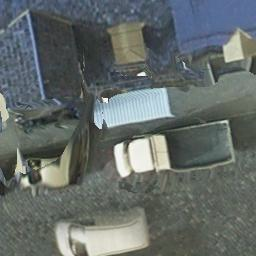

In [2]:
X_images[0]

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
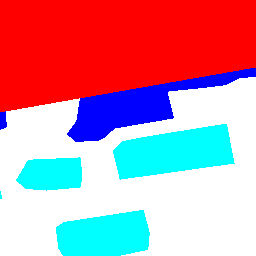

In [3]:
y_masks[0]

Este código define una función rgb_to_2D_label que convierte una imagen de máscara de segmentación de color en una imagen de etiquetas 2D, asignando índices de clase específicos a cada color. Luego, aplica esta función a cada máscara en y_masks, creando una lista de etiquetas segmentadas. Finalmente, convierte esta lista en un array numpy y agrega una dimensión adicional, verificando y mostrando las etiquetas únicas presentes en el conjunto de datos.

*Questo codice definisce una funzione rgb_to_2D_label che converte un'immagine di maschera di segmentazione a colori in un'immagine di etichette 2D, assegnando specifici indici di classe a ogni colore. Successivamente, applica questa funzione a ogni maschera in y_masks, creando un elenco di etichette segmentate. Infine, converte questo elenco in un array numpy e aggiunge una dimensione aggiuntiva, verificando e mostrando le etichette uniche presenti nel set di dati.*

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Definir colores
Background = (0, 0, 0) # Negro
Roads = (255, 255,255) #Blanco
Building = (0, 0, 255) #Azul
Low_vegetation = (0, 255, 255) #Blue Cean
Tree = (0, 255, 0) #Verde
Car = (255, 255, 0) #Amarillo

def rgb_to_2D_label(label):
    """
    Replace pixels with specific RGB values to their class index.
    """
    label_seg = np.zeros(label.shape[:2], dtype=np.uint8)
    label_seg[np.all(label == Background, axis=-1)] = 0
    label_seg[np.all(label == Roads, axis=-1)] = 1
    label_seg[np.all(label == Building, axis=-1)] = 2
    label_seg[np.all(label == Low_vegetation, axis=-1)] = 3
    label_seg[np.all(label == Tree, axis=-1)] = 4
    label_seg[np.all(label == Car, axis=-1)] = 5

    return label_seg

labels = []
for mask in y_masks:
    label = rgb_to_2D_label(mask)
    labels.append(label)

labels = np.array(labels)
labels = np.expand_dims(labels, axis=-1)

print("Unique labels in label dataset are: ", np.unique(labels))


Unique labels in label dataset are:  [0 1 2 3 4 5]


Este código divide el conjunto de datos en conjuntos de entrenamiento, validación y prueba. Primero, toma los primeros 10,000 elementos de X_images y labels, dividiéndolos en 80% para entrenamiento y 20% para prueba, y luego toma el conjunto de entrenamiento y lo divide en 90% para entrenamiento y 10% para validación. A continuación, toma los últimos 12,356 elementos y realiza la misma división, creando conjuntos de entrenamiento, validación y prueba adicionales.

*Questo codice divide il dataset in set di addestramento, validazione e test. Prima prende i primi 10.000 elementi di X_images e labels, dividendoli in 80% per addestramento e 20% per test, poi prende il set di addestramento e lo divide in 90% per addestramento e 10% per validazione. Successivamente, prende gli ultimi 12.356 elementi e esegue la stessa divisione, creando ulteriori set di addestramento, validazione e test.*

In [6]:
#Divisione del dataset
X_train, X_test, y_train, y_test = train_test_split(X_images[:10000], labels[:10000], test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#Divisione extra
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X_images[-12356:], labels[-12356:], test_size=0.20, random_state=42)
X_trainA, X_valA, y_trainA, y_valA = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [7]:
#X_train.shape
#X_test.shape
#X_val.shape
print("Dimesioni del train, test and validation:",X_train.shape, X_val.shape, X_test.shape )
print("Dimesioni del train, test and validation:",X_trainA.shape, X_valA.shape, X_testA.shape )

Dimesioni del train, test and validation: (7200, 256, 256, 3) (800, 256, 256, 3) (2000, 256, 256, 3)
Dimesioni del train, test and validation: (6480, 256, 256, 3) (720, 256, 256, 3) (2472, 256, 256, 3)


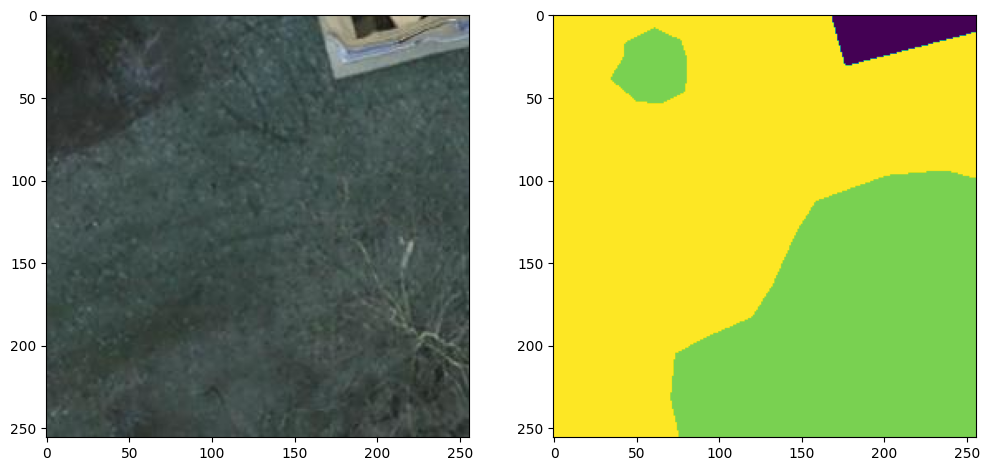

In [8]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
image_number = random.randint(0, len(X_images))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_images[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

Este código define la función unet_multiclass que crea un modelo U-Net para segmentación de imágenes multiclass usando Keras. El modelo incluye un codificador (encoder) y un decodificador (decoder), con capas de convolución, max pooling, dropout y transposed convolutions para aumentar la resolución de la imagen segmentada. La entrada es una imagen redimensionada y normalizada, y la salida es una imagen segmentada con una capa softmax que asigna cada píxel a una de las clases especificadas.

*Questo codice definisce una funzione unet_multiclass che crea un modello U-Net per la segmentazione di immagini multiclass utilizzando Keras. Il modello include un codificatore (encoder) e un decodificatore (decoder), con strati di convoluzione, max pooling, dropout e convoluzioni trasposte per aumentare la risoluzione dell'immagine segmentata. L'input è un'immagine ridimensionata e normalizzata, e l'output è un'immagine segmentata con uno strato softmax che assegna ogni pixel a una delle classi specificate.*

In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose, Rescaling
from tensorflow.keras.models import Model


def unet_multiclass(input_shape, num_classes):
    inputs = Input(input_shape)
    scaled_inputs = Rescaling(1./255)(inputs)


    # Encoder
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(scaled_inputs)
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(512, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

   # Decoder
    up6 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(32, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(32, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(num_classes, 1, activation='softmax')(conv9)
    model = Model(inputs=inputs, outputs=outputs)

    return model

Este código define el tamaño de entrada para las imágenes y el número de clases para el modelo de segmentación U-Net. El tamaño de entrada se establece en 256x256 píxeles con 3 canales (RGB), y se especifica que el modelo debe segmentar las imágenes en 6 clases diferentes.

*Questo codice definisce la dimensione dell'input per le immagini e il numero di classi per il modello di segmentazione U-Net. La dimensione dell'input è impostata su 256x256 pixel con 3 canali (RGB) e si specifica che il modello deve segmentare le immagini in 6 classi diverse.*

In [5]:
# Definir el tamaño de entrada de las imágenes y el número de clases
input_shape = (256, 256, 3)
num_classes = 6  # Número de clases

Este código construye y compila el modelo U-Net para segmentación multiclase creado con la funcion precedente, utilizando sparse_categorical_crossentropy como función de pérdida y adam como optimizador. Luego, entrena el modelo con los datos de entrenamiento y validación, especificando 30 épocas y un tamaño de lote de 64.

*Questo codice costruisce e compila il modello U-Net per la segmentazione multiclass creato con la funzione anteriore, utilizzando sparse_categorical_crossentropy come funzione di perdita e adam come ottimizzatore. Successivamente, addestra il modello con i dati di addestramento e validazione, specificando 30 epoche e una dimensione del batch di 64.*

In [23]:


# Construir el modelo U-Net para segmentación multiclase
model = unet_multiclass(input_shape, num_classes)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
#model.summary()

# Ajuste del tamaño del lote
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/30
113/113 [==============================] - 188s 977ms/step - loss: 1.4987 - accuracy: 0.3410 - val_loss: 1.2794 - val_accuracy: 0.4996
Epoch 2/30
113/113 [==============================] - 75s 663ms/step - loss: 1.1335 - accuracy: 0.5612 - val_loss: 1.1371 - val_accuracy: 0.5492
Epoch 3/30
113/113 [==============================] - 75s 661ms/step - loss: 1.0312 - accuracy: 0.5927 - val_loss: 1.0202 - val_accuracy: 0.5942
Epoch 4/30
113/113 [==============================] - 75s 662ms/step - loss: 0.9855 - accuracy: 0.6069 - val_loss: 0.9965 - val_accuracy: 0.6013
Epoch 5/30
113/113 [==============================] - 75s 662ms/step - loss: 0.9458 - accuracy: 0.6227 - val_loss: 0.9221 - val_accuracy: 0.6236
Epoch 6/30
113/113 [==============================] - 75s 662ms/step - loss: 0.9168 - accuracy: 0.6354 - val_loss: 0.9043 - val_accuracy: 0.6394
Epoch 7/30
113/113 [==============================] - 75s 662ms/step - loss: 0.8849 - accuracy: 0.6524 - val_loss: 0.8936 - val_a

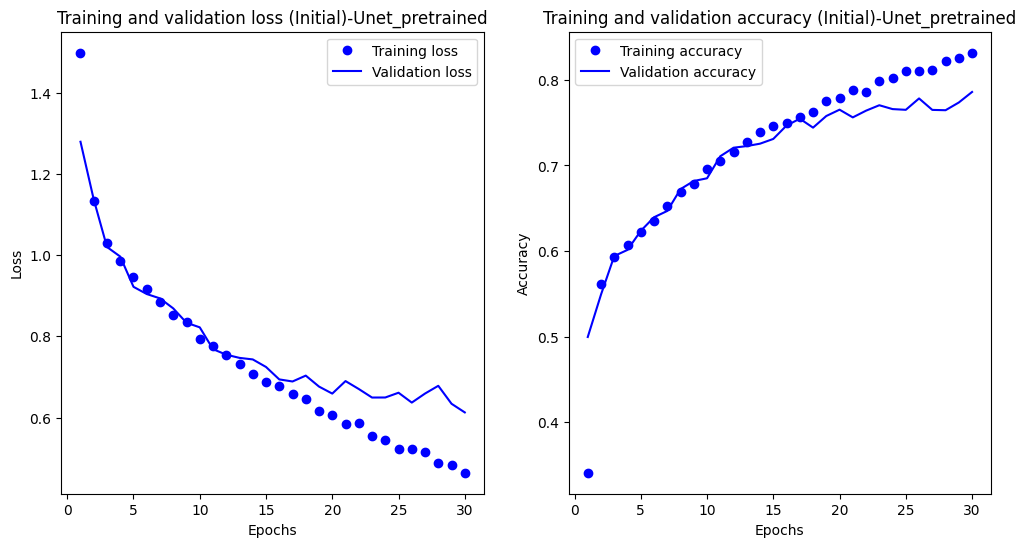

In [24]:
import matplotlib.pyplot as plt

# Primer gráfico: historial de entrenamiento inicial
plt.figure(figsize=(12, 6))

# Gráfico de pérdidas
plt.subplot(1, 2, 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss (Initial)-Unet_pretrained")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Gráfico de exactitud
plt.subplot(1, 2, 2)
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy (Initial)-Unet_pretrained")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [25]:
model.save('unet_pretrained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Este código realiza predicciones en el conjunto de prueba utilizando el modelo U-Net entrenado y evalúa el rendimiento del modelo. Convierte las predicciones de one-hot a etiquetas de clase, aplanando las matrices para su compatibilidad con las funciones de evaluación de scikit-learn. Calcula y muestra la matriz de confusión en porcentajes, así como las métricas de exactitud, precisión, recall, F1-score e índice de Jaccard. Finalmente, imprime los resultados, indicando que la matriz de confusión y las métricas reflejan el rendimiento del modelo en la segmentación de las clases definidas.

Los resultados indican que el modelo U-Net tiene un desempeño razonable en la segmentación multiclass. La exactitud general es del 78.71%, con una precisión promedio del 74.90%, un recall del 72.07% y un F1-score del 73.29%. La matriz de confusión muestra que la mayoría de las clases son correctamente identificadas, aunque hay algunas confusiones notables, como los edificios que a veces se clasifican como fondos o carreteras. En general, el modelo funciona mejor en clases como el fondo (BG) y las carreteras (Roads), pero tiene más dificultades con clases como los edificios y los coches.

*Questo codice esegue previsioni sul set di test utilizzando il modello U-Net addestrato e valuta le prestazioni del modello. Converte le previsioni da one-hot a etichette di classe, appiattendo le matrici per la compatibilità con le funzioni di valutazione di scikit-learn. Calcola e mostra la matrice di confusione in percentuali, nonché le metriche di accuratezza, precisione, richiamo, F1-score e indice di Jaccard. Infine, stampa i risultati, indicando che la matrice di confusione e le metriche riflettono le prestazioni del modello nella segmentazione delle classi definite.*

*I risultati indicano che il modello U-Net ha una prestazione ragionevole nella segmentazione multiclass. L'accuratezza generale è del 78,71%, con una precisione media del 74,90%, un recall del 72,07% e un F1-score del 73,29%. La matrice di confusione mostra che la maggior parte delle classi sono correttamente identificate, sebbene ci siano alcune confusioni notevoli, come gli edifici che a volte vengono classificati come sfondo o strade. In generale, il modello funziona meglio con classi come lo sfondo (BG) e le strade (Roads), ma ha più difficoltà con classi come gli edifici e le auto.*

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, jaccard_score

# Realizar predicciones en el conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)  # Convertir predicciones de one-hot a etiquetas de clase

# Aplanar las matrices para que sean compatibles con las funciones de scikit-learn
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Definir nombres de las clases
class_names = ["BG", "Roads", "Building", "LowV", "Tree", "Car"]

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat, labels=range(len(class_names)))

# Convertir la matriz de confusión a porcentajes
conf_matrix_percent = np.round(conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100, 2)

# Crear un DataFrame de pandas para la matriz de confusión con nombres de clases
conf_matrix_df = pd.DataFrame(conf_matrix_percent, index=class_names, columns=class_names)

# Calcular la exactitud, precisión, recall y F1-score
accuracy = accuracy_score(y_test_flat, y_pred_flat)
precision = precision_score(y_test_flat, y_pred_flat, average='macro')
recall = recall_score(y_test_flat, y_pred_flat, average='macro')
f1 = f1_score(y_test_flat, y_pred_flat, average='macro')
jaccard = jaccard_score(y_test_flat, y_pred_flat, average='macro')

print("Confusion Matrix (in %):")
print(conf_matrix_df)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Jaccard Index: {jaccard}")


63/63 [==============================] - 5s 86ms/step
Confusion Matrix (in %):
             BG  Roads  Building   LowV   Tree    Car
BG        84.57   8.77      1.73   0.22   0.97   3.75
Roads      5.33  84.51      2.16   0.17   3.46   4.37
Building  17.41  18.41     44.97   0.41   5.61  13.19
LowV       5.86  16.46      4.99  70.08   2.12   0.48
Tree       1.08   4.73      1.59   0.21  74.77  17.63
Car        3.54   5.11      2.91   0.01  14.91  73.53
Accuracy: 0.7871505661010743
Precision: 0.7489655132403841
Recall: 0.7206829994740334
F1-Score: 0.7328970210614908
Jaccard Index: 0.5940351817817756


#SEGUNDO MODELO UNET_petrained2
Realizamos un segundo modelo el cual es compilado con las 12356 imagenes restantes, pero con la base del primer modelo creado. Este código realiza el ajuste fino (fine-tuning) del modelo U-Net preentrenado anteriormente. Primero, carga el modelo con pesos preentrenados y congela ciertas capas (del 2 al 18) para que no se entrenen(encoder completo). Luego, compila y entrena el modelo con las capas congeladas utilizando los datos X_trainA y y_trainA durante 20 épocas. Después, descongela las mismas capas y recompila el modelo con una tasa de aprendizaje más baja. Finalmente, continúa el entrenamiento durante otras 20 épocas para ajustar finamente el modelo en los datos de entrenamiento y validación.

*Realizziamo un secondo modello che viene compilato con le restanti 12356 immagini, ma con la base del primo modello creato.Questo codice esegue il fine-tuning del modello U-Net pre-addestrato anteriore. Prima carica il modello con pesi pre-addestrati e congela alcuni strati (dai numeri 2 al 18) per evitare che vengano addestrati (encoder completo). Poi compila e allena il modello con gli strati congelati utilizzando i dati X_trainA e y_trainA per 20 epoche. Successivamente, sblocca gli stessi strati e ricompila il modello con una velocità di apprendimento più bassa. Infine, continua l'addestramento per altre 20 epoche per ottimizzare ulteriormente il modello sui dati di addestramento e validazione.*


In [11]:

# Fine-tuning del modelo

# Cargar el modelo preentrenado
model1 = unet_multiclass(input_shape, num_classes)
model1.load_weights('unet_pretrained.h5')

# Congelar capas específicas
for i, layer in enumerate(model1.layers):
    if i in range(2, 19):  # Cambiado a `range` para incluir las capas entre 2 y 18
        layer.trainable = False

# Compilar el modelo
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con las capas congeladas
history1 = model1.fit(X_trainA, y_trainA, epochs=20, batch_size=32, validation_data=(X_valA, y_valA))

# Descongelar algunas capas y continuar entrenando
for i, layer in enumerate(model1.layers):
    if i in range(2, 19):  # Cambiado a `range` para incluir las capas entre 2 y 18
        layer.trainable = True

# Compilar el modelo nuevamente con una tasa de aprendizaje más baja
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continuar entrenando
history_finetune = model1.fit(X_trainA, y_trainA, epochs=20, batch_size=32, validation_data=(X_valA, y_valA))

Epoch 1/20
203/203 [==============================] - 96s 315ms/step - loss: 0.5412 - accuracy: 0.8086 - val_loss: 0.5303 - val_accuracy: 0.8088
Epoch 2/20
203/203 [==============================] - 49s 239ms/step - loss: 0.5274 - accuracy: 0.8124 - val_loss: 0.5203 - val_accuracy: 0.8135
Epoch 3/20
203/203 [==============================] - 49s 242ms/step - loss: 0.5190 - accuracy: 0.8147 - val_loss: 0.5179 - val_accuracy: 0.8164
Epoch 4/20
203/203 [==============================] - 49s 241ms/step - loss: 0.5167 - accuracy: 0.8157 - val_loss: 0.5168 - val_accuracy: 0.8170
Epoch 5/20
203/203 [==============================] - 49s 241ms/step - loss: 0.5117 - accuracy: 0.8176 - val_loss: 0.5141 - val_accuracy: 0.8150
Epoch 6/20
203/203 [==============================] - 49s 240ms/step - loss: 0.5052 - accuracy: 0.8185 - val_loss: 0.5101 - val_accuracy: 0.8169
Epoch 7/20
203/203 [==============================] - 49s 241ms/step - loss: 0.5006 - accuracy: 0.8207 - val_loss: 0.5105 - val_ac

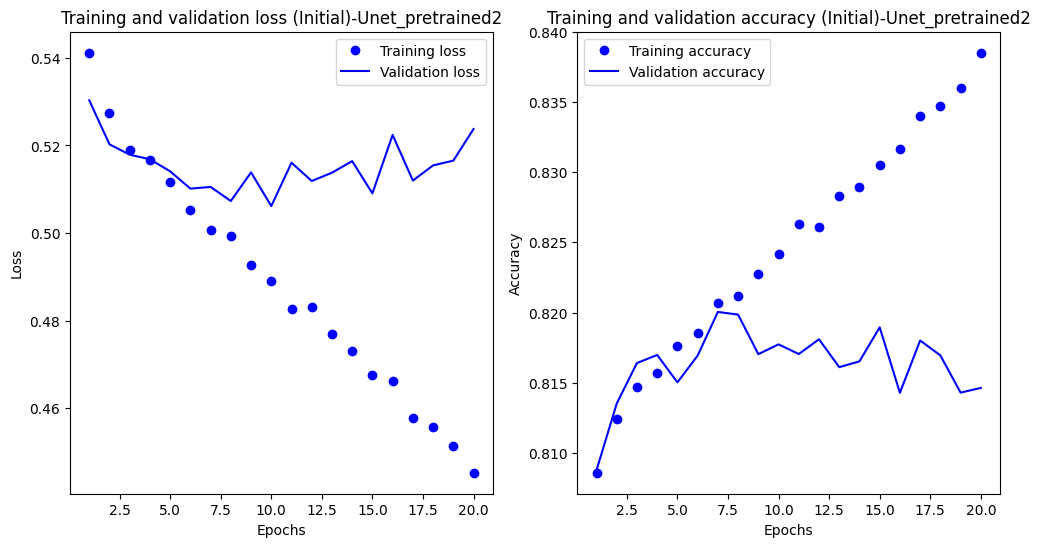

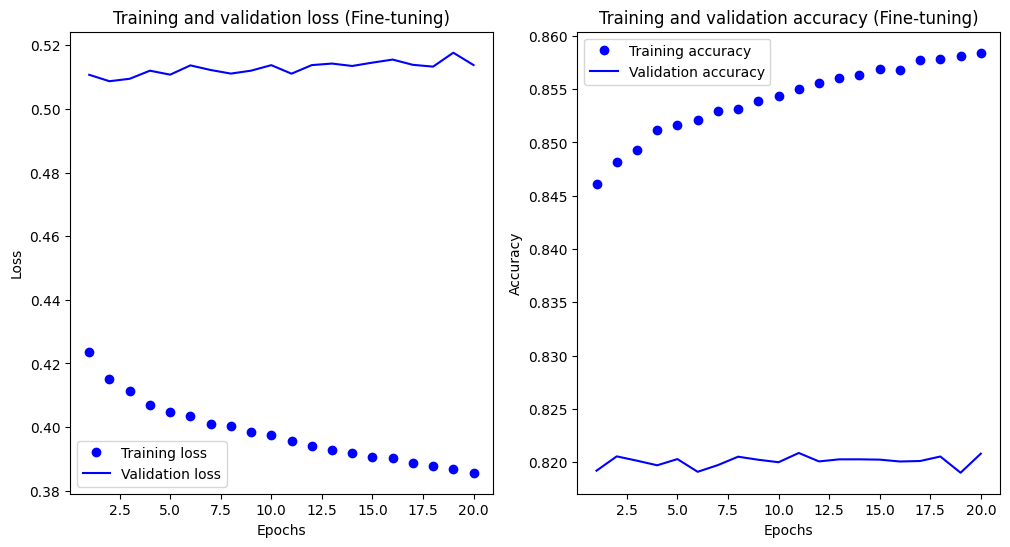

In [12]:
# Gráfico de exactitud

import matplotlib.pyplot as plt

# Primer gráfico: historial de entrenamiento inicial
plt.figure(figsize=(12, 6))

# Gráfico de pérdidas
plt.subplot(1, 2, 1)
loss1 = history1.history["loss"]
val_loss1 = history1.history["val_loss"]
epochs1 = range(1, len(loss1) + 1)
plt.plot(epochs1, loss1, "bo", label="Training loss")
plt.plot(epochs1, val_loss1, "b", label="Validation loss")
plt.title("Training and validation loss (Initial)-Unet_pretrained2")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Gráfico de exactitud
plt.subplot(1, 2, 2)
acc1 = history1.history["accuracy"]
val_acc1 = history1.history["val_accuracy"]
plt.plot(epochs1, acc1, "bo", label="Training accuracy")
plt.plot(epochs1, val_acc1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy (Initial)-Unet_pretrained2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Segundo gráfico: historial de ajuste fino
plt.figure(figsize=(12, 6))

# Gráfico de pérdidas
plt.subplot(1, 2, 1)
loss2 = history_finetune.history["loss"]
val_loss2 = history_finetune.history["val_loss"]
epochs2 = range(1, len(loss2) + 1)
plt.plot(epochs2, loss2, "bo", label="Training loss")
plt.plot(epochs2, val_loss2, "b", label="Validation loss")
plt.title("Training and validation loss (Fine-tuning)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Gráfico de exactitud
plt.subplot(1, 2, 2)
acc2 = history_finetune.history["accuracy"]
val_acc2 = history_finetune.history["val_accuracy"]
plt.plot(epochs2, acc2, "bo", label="Training accuracy")
plt.plot(epochs2, val_acc2, "b", label="Validation accuracy")
plt.title("Training and validation accuracy (Fine-tuning)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


Los resultados del segundo modelo indican un rendimiento sólido en la segmentación multiclase. La matriz de confusión muestra un alto nivel de precisión en la clasificación de la mayoría de las clases, con la clase "LowV" (vegetación baja) siendo la mejor identificada con un 80.68% de precisión. La exactitud general del modelo es del 81.03%, lo que sugiere que el modelo es bastante efectivo en la segmentación de imágenes. Las métricas de precisión, recall y F1-score también son altas, indicando un buen equilibrio entre la identificación correcta de las clases y la minimización de errores. El índice de Jaccard de 0.64 muestra una buena solapación entre las predicciones y las etiquetas verdaderas, reflejando una alta capacidad de coincidencia entre las clases predichas y las reales.

*I risultati del secondo modello indicano una prestazione solida nella segmentazione multiclasse. La matrice di confusione mostra un alto livello di precisione nella classificazione della maggior parte delle classi, con la classe "LowV" (vegetazione bassa) che è la meglio identificata con una precisione dell'80,68%. La accuratezza generale del modello è dell'81,03%, suggerendo che il modello è piuttosto efficace nella segmentazione delle immagini. Le metriche di precisione, recall e F1-score sono anch'esse elevate, indicando un buon equilibrio tra l'identificazione corretta delle classi e la minimizzazione degli errori. L'indice di Jaccard di 0,64 mostra una buona sovrapposizione tra le previsioni e le etichette vere, riflettendo un'alta capacità di corrispondenza tra le classi predette e quelle reali.*

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import jaccard_score

# Realizar predicciones en el conjunto de datos de prueba
y_predA = model1.predict(X_testA)
y_predA = np.argmax(y_predA, axis=-1)  # Convertir predicciones de one-hot a etiquetas de clase

# Aplanar las matrices para que sean compatibles con las funciones de scikit-learn
y_test_flatA = y_testA.flatten()
y_pred_flatA = y_predA.flatten()

 #Definir nombres de las clases
class_names = ["BG", "Roads", "Building", "LowV", "Tree", "Car"]

# Calcular la matriz de confusión
conf_matrixA = confusion_matrix(y_test_flatA, y_pred_flatA, labels=range(len(class_names)))

# Convertir la matriz de confusión a porcentajes
conf_matrix_percentA = np.round(conf_matrixA / conf_matrixA.sum(axis=1, keepdims=True) * 100, 2)

# Crear un DataFrame de pandas para la matriz de confusión con nombres de clases
conf_matrix_dfA = pd.DataFrame(conf_matrix_percentA, index=class_names, columns=class_names)

# Calcular la exactitud, precisión, recall y F1-score
accuracyA = accuracy_score(y_test_flatA, y_pred_flatA)
precisionA = precision_score(y_test_flatA, y_pred_flatA, average='macro')
recallA = recall_score(y_test_flatA, y_pred_flatA, average='macro')
f1A = f1_score(y_test_flatA, y_pred_flatA, average='macro')

# Calcular el índice de Jaccard para cada clase y luego el promedio macro
jaccardA = jaccard_score(y_test_flatA, y_pred_flatA, average='macro')

print("Confusion Matrix (in %):")
print(conf_matrix_dfA)
print(f"Accuracy: {accuracyA}")
print(f"Precision: {precisionA}")
print(f"Recall: {recallA}")
print(f"F1-Score: {f1A}")
print(f"Jaccard Index: {jaccardA}")

78/78 [==============================] - 9s 115ms/step
Confusion Matrix (in %):
             BG  Roads  Building   LowV   Tree    Car
BG        87.65   6.28      1.13   0.21   1.08   3.65
Roads      5.21  84.48      2.28   0.40   2.01   5.61
Building  12.86  14.92     52.06   0.79   3.65  15.72
LowV       2.33  10.51      4.16  80.68   1.52   0.80
Tree       1.40   5.56      0.94   0.25  71.14  20.70
Car        2.84   4.39      2.42   0.03   8.64  81.68
Accuracy: 0.8102957407633463
Precision: 0.7797728902198716
Recall: 0.7628283269569379
F1-Score: 0.7701548011042797
Jaccard Index: 0.6375737355559844


In [14]:
suma_total = np.sum(conf_matrixA)
suma_total

162004992

Este código realiza la visualización de imágenes de prueba y sus correspondientes segmentaciones. Primero, define una función para convertir etiquetas 2D a imágenes RGB utilizando colores específicos para cada clase. Luego, realiza predicciones en un subconjunto de imágenes de prueba y convierte estas predicciones a clases. Finalmente, muestra cinco imágenes originales junto con sus máscaras reales y las máscaras predichas por el modelo, permitiendo comparar visualmente el rendimiento del modelo en la segmentación.

*Questo codice esegue la visualizzazione delle immagini di test e delle loro segmentazioni corrispondenti. Prima definisce una funzione per convertire le etichette 2D in immagini RGB utilizzando colori specifici per ciascuna classe. Poi esegue previsioni su un sottoinsieme di immagini di test e converte queste previsioni in classi. Infine, mostra cinque immagini originali insieme alle loro maschere reali e alle maschere predette dal modello, consentendo di confrontare visivamente le prestazioni del modello nella segmentazione.*

1/1 [==============================] - 1s 1s/step


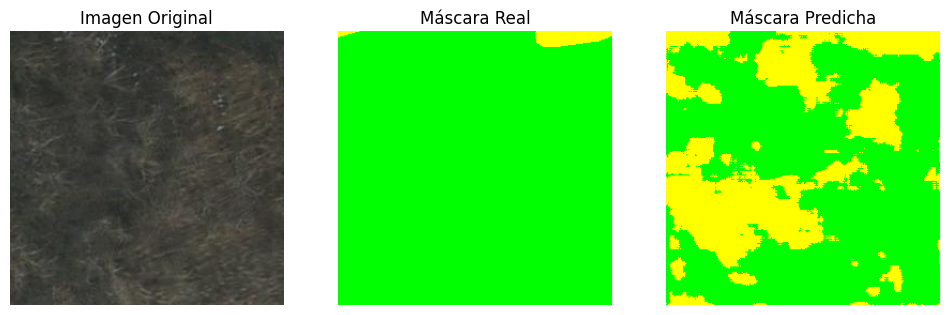

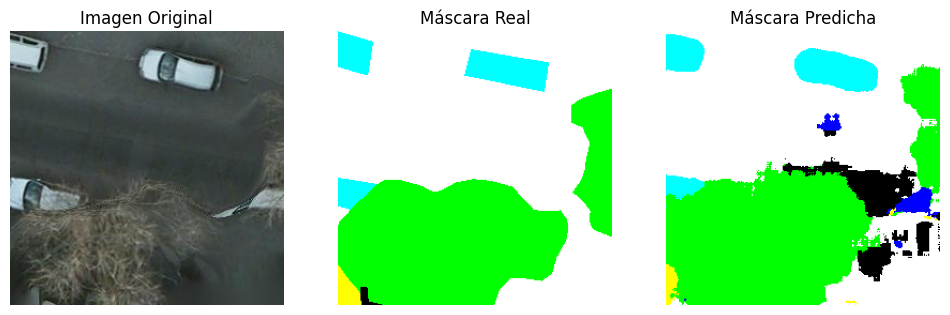

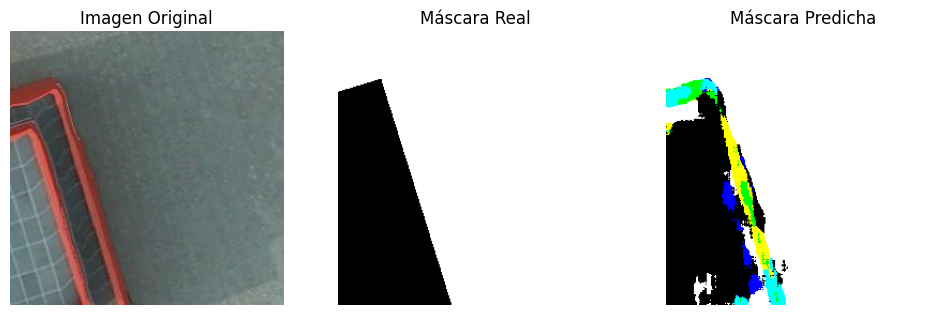

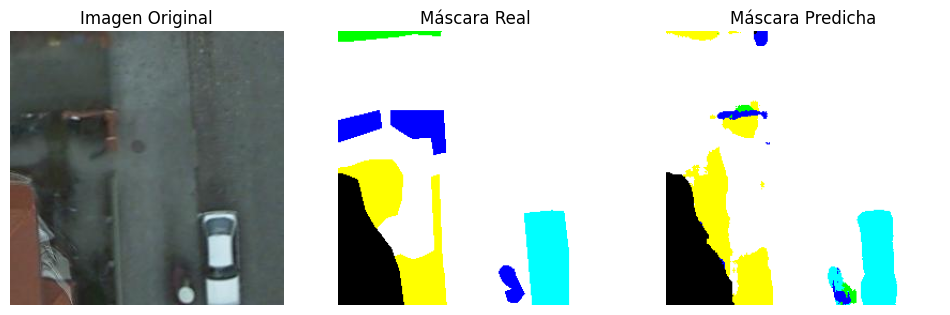

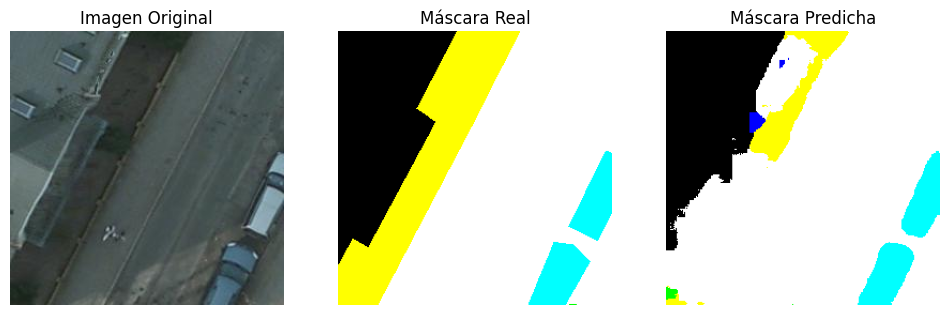

In [15]:
import matplotlib.pyplot as plt

# Definir una función para convertir etiquetas 2D a RGB
def label_to_rgb(label):
    label = label.squeeze()
    label_rgb = np.zeros((*label.shape, 3), dtype=np.uint8)
    label_rgb[label == 0] = Background
    label_rgb[label == 1] = Roads
    label_rgb[label == 2] = Building
    label_rgb[label == 3] = Low_vegetation
    label_rgb[label == 4] = Tree
    label_rgb[label == 5] = Car
    return label_rgb

PImg = X_testA[:5]
Mimg = y_testA[:5]

# Realizar predicciones en el conjunto de prueba
predictions = model1.predict(PImg)

# Obtener la clase con la mayor probabilidad
predicted_classes = np.argmax(predictions, axis=-1)

# Visualizar las imágenes y sus predicciones
num_images = 5  # Número de imágenes a visualizar

for i in range(num_images):
    plt.figure(figsize=(12, 4))

    # Mostrar la imagen original
    plt.subplot(1, 3, 1)
    plt.title("Imagen Original")
    plt.imshow(cv2.cvtColor(PImg[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Mostrar la máscara real
    plt.subplot(1, 3, 2)
    plt.title("Máscara Real")
    plt.imshow(label_to_rgb(Mimg[i]))
    plt.axis('off')

    # Mostrar la máscara predicha
    plt.subplot(1, 3, 3)
    plt.title("Máscara Predicha")
    plt.imshow(label_to_rgb(predicted_classes[i]))
    plt.axis('off')

    plt.show()


#MODELO RESNET_50-UNET

En este apartado se definira un tercer modelo con utilizando la arquitectura UNET con en el encoder RESNET

*In questa sezione verrà definito un terzo modello che utilizza l'architettura UNET con l'encoder RESNET.*

In [3]:
#Divisione del dataset
X_train, X_test, y_train, y_test = train_test_split(X_images[:20000], labels[:20000], test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Este código define la arquitectura de red neuronal conocida como U-Net con ResNet50 como encoder. Utiliza la red ResNet50 preentrenada como extractor de características en el codificador, congelando sus capas para preservar el conocimiento previo. A continuación, realiza la decodificación mediante UpSampling2D y concatenación con las salidas de las capas correspondientes de ResNet50. Finalmente, se aplican capas convolucionales para refinar las características y se obtiene la salida mediante una capa Conv2D con activación softmax para clasificación multiclase. Este enfoque combina la robustez de ResNet50 con la capacidad de segmentación precisa de U-Net.

*Questo codice definisce un'architettura di rete neurale nota come U-Net con ResNet50 come encoder. Utilizza la rete ResNet50 pre-addestrata come estrattore di caratteristiche nel codificatore, congelando i suoi strati per preservare la conoscenza preesistente. Successivamente, esegue la decodifica mediante UpSampling2D e concatenazione con le uscite degli strati corrispondenti di ResNet50. Infine, vengono applicate le convoluzioni per affinare le caratteristiche e si ottiene l'uscita tramite uno strato Conv2D con attivazione softmax per la classificazione multiclasse. Questo approccio combina la robustezza di ResNet50 con la capacità di segmentazione precisa di U-Net.*

In [4]:


import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

def resnet50_unet(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the ResNet50 layers
    for layer in base_model.layers:
        layer.trainable = False

    # Encoder: Extract features from the ResNet50 layers
    conv1 = base_model.get_layer('conv1_relu').output
    conv2 = base_model.get_layer('conv2_block3_out').output
    conv3 = base_model.get_layer('conv3_block4_out').output
    conv4 = base_model.get_layer('conv4_block6_out').output
    conv5 = base_model.get_layer('conv5_block3_out').output

    # Decoder: Up-sampling and concatenation
    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    up10 = UpSampling2D(size=(2, 2))(conv9)
    conv10 = Conv2D(32, 3, activation='relu', padding='same')(up10)
    conv10 = Conv2D(32, 3, activation='relu', padding='same')(conv10)

    outputs = Conv2D(num_classes, 1, activation='softmax')(conv10)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

In [7]:
# Crear el modelo
input_shape = (256, 256, 3)  # Ajusta según tu tamaño de imagen
num_classes = 6  # Número de clases en tu tarea de segmentación
model2 = resnet50_unet(input_shape, num_classes)

# Compilar el modelo
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Verificar la estructura del modelo
#model.summary()

# Entrenar el modelo
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=128)


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/30
113/113 [==============================] - 264s 2s/step - loss: 2.0498 - accuracy: 0.3254 - val_loss: 1.3887 - val_accuracy: 0.3584
Epoch 2/30
113/113 [==============================] - 150s 1s/step - loss: 1.1336 - accuracy: 0.5474 - val_loss: 1.0198 - val_accuracy: 0.5909
Epoch 3/30
113/113 [==============================] - 150s 1s/step - loss: 0.9307 - accuracy: 0.6671 - val_loss: 0.8111 - val_accuracy: 0.7200
Epoch 4/30
113/113 [==============================] - 150s 1s/step - loss: 0.8493 - accuracy: 0.7046 - val_loss: 0.8196 - val_accuracy: 0.7132
Epoch 5/30
113/113 [==============================] - 150s 1s/step - loss: 0.7980 - accuracy: 0.7235 - val_loss: 0.6785 - val_accuracy: 0.7632
Epoch 6/30
113/113 [==============================] - 149s 1s/step - loss: 0.7489 - accuracy: 0.7413 - val_loss: 0.6749 - val_accuracy: 0.7640
Epoch 7/30
113/113 [==============================] - 149s 1s/step - loss: 0.

In [8]:
model2.save('resnet50_unet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


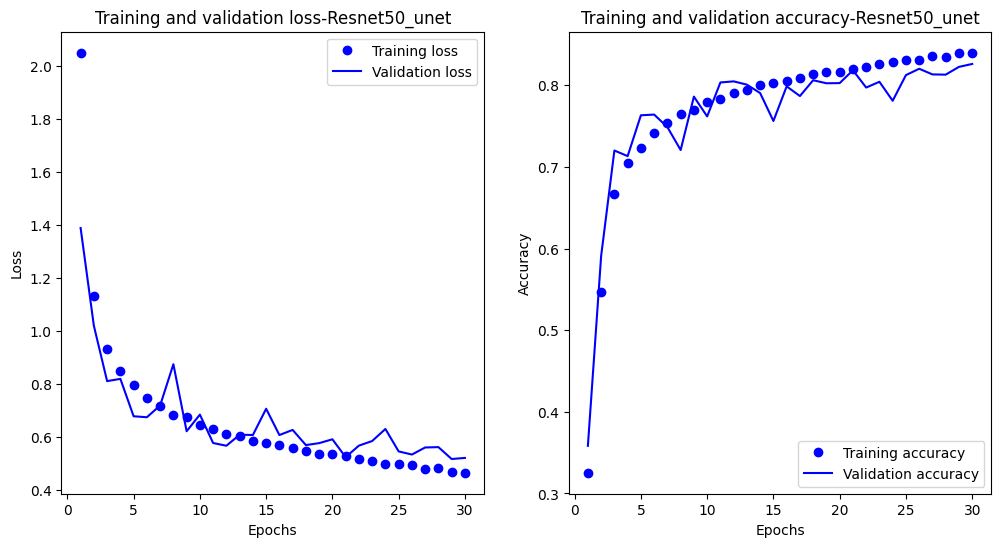

In [9]:
import matplotlib.pyplot as plt

# Primer gráfico: historial de entrenamiento inicial
plt.figure(figsize=(12, 6))

# Gráfico de pérdidas
plt.subplot(1, 2, 1)
loss3 = history2.history["loss"]
val_loss3 = history2.history["val_loss"]
epochs3 = range(1, len(loss3) + 1)
plt.plot(epochs3, loss3, "bo", label="Training loss")
plt.plot(epochs3, val_loss3, "b", label="Validation loss")
plt.title("Training and validation loss-Resnet50_unet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Gráfico de exactitud
plt.subplot(1, 2, 2)
acc3 = history2.history["accuracy"]
val_acc3 = history2.history["val_accuracy"]
plt.plot(epochs3, acc3, "bo", label="Training accuracy")
plt.plot(epochs3, val_acc3, "b", label="Validation accuracy")
plt.title("Training and validation accuracy-Resnet50_unet")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Los resultados del modelo ResNet50-U-Net muestran un rendimiento notable en la tarea de segmentación multiclase. La precisión global del modelo es del 84.58%, indicando que el modelo clasifica correctamente la mayoría de las imágenes. La precisión es del 84.72%, lo que sugiere que el modelo es bueno para evitar falsas alarmas. El recall es del 79.62%, indicando que el modelo es efectivo para detectar la mayoría de las instancias de cada clase, aunque hay margen de mejora. El F1-Score de 81.61% muestra un equilibrio robusto entre precisión y recall. Finalmente, el índice de Jaccard de 0.70 indica una buena capacidad de superposición entre las predicciones y las verdaderas máscaras, reflejando una alta calidad en la segmentación realizada por el modelo.

*I risultati del modello ResNet50-U-Net mostrano un'eccellente prestazione nel compito di segmentazione multiclasse. La precisione globale del modello è dell'84,58%, indicando che il modello classifica correttamente la maggior parte delle immagini. La precisione è dell'84,72%, suggerendo che il modello è efficace nel ridurre i falsi allarmi. Il recall è del 79,62%, indicando che il modello è bravo a rilevare la maggior parte delle istanze di ciascuna classe, sebbene ci sia spazio per miglioramenti. L'F1-Score del 81,61% mostra un buon equilibrio tra precisione e recall. Infine, l'indice di Jaccard di 0,70 indica una buona sovrapposizione tra le previsioni e le vere maschere, riflettendo un'alta qualità nella segmentazione effettuata dal modello.*


In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import jaccard_score

model2 = resnet50_unet(input_shape, num_classes)
model2.load_weights('resnet50_unet.h5')

# Realizar predicciones en el conjunto de datos de prueba
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)  # Convertir predicciones de one-hot a etiquetas de clase

# Aplanar las matrices para que sean compatibles con las funciones de scikit-learn
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Definir nombres de las clases
class_names = ["BG", "Roads", "Building", "LowV", "Tree", "Car"]

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat, labels=range(len(class_names)))

# Convertir la matriz de confusión a porcentajes
conf_matrix_percent = np.round(conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100, 2)

# Crear un DataFrame de pandas para la matriz de confusión con nombres de clases
conf_matrix_df = pd.DataFrame(conf_matrix_percent, index=class_names, columns=class_names)

# Calcular la exactitud, precisión, recall y F1-score
accuracy = accuracy_score(y_test_flat, y_pred_flat)
precision = precision_score(y_test_flat, y_pred_flat, average='macro')
recall = recall_score(y_test_flat, y_pred_flat, average='macro')
f1 = f1_score(y_test_flat, y_pred_flat, average='macro')
jaccard = jaccard_score(y_test_flat, y_pred_flat, average='macro')

print("Confusion Matrix (in %):")
print(conf_matrix_df)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Jaccard Index: {jaccard}")

125/125 [==============================] - 27s 153ms/step
Confusion Matrix (in %):
             BG  Roads  Building   LowV   Tree    Car
BG        88.86   5.90      0.29   0.20   0.71   4.03
Roads      3.37  87.61      0.70   0.27   1.42   6.62
Building  11.68  14.83     57.77   0.39   1.55  13.78
LowV       3.44  12.64      0.59  81.12   1.27   0.94
Tree       0.62   4.09      0.37   0.16  74.12  20.64
Car        1.80   3.97      0.85   0.02   5.13  88.24
Accuracy: 0.8457621192932129
Precision: 0.8472074370839437
Recall: 0.7962116113919736
F1-Score: 0.8160565458791428
Jaccard Index: 0.6955008937631887


1/1 [==============================] - 3s 3s/step


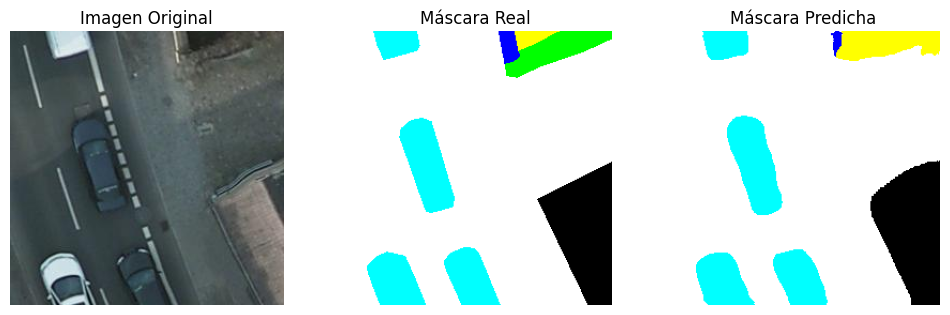

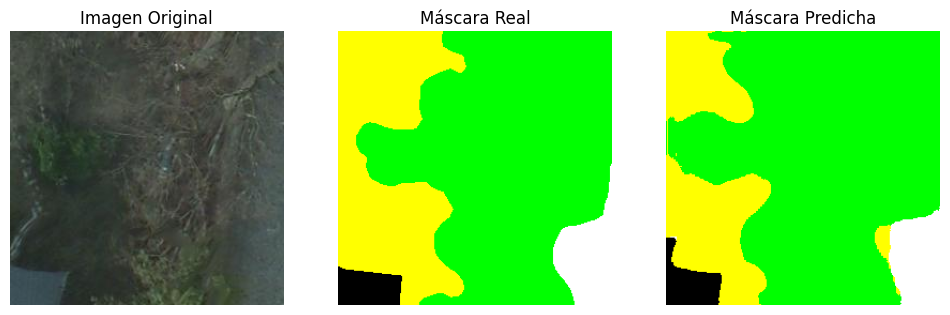

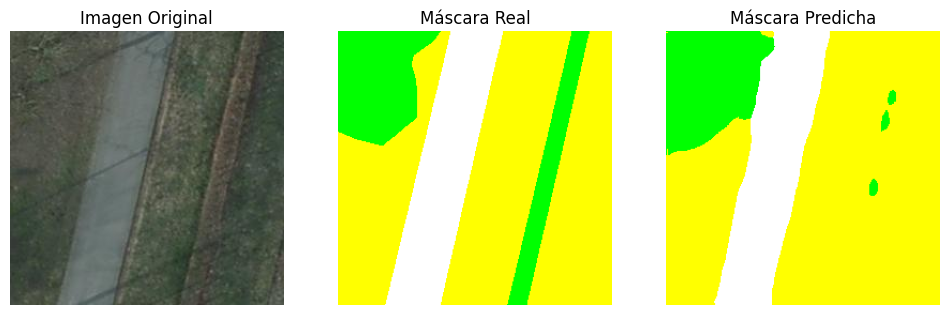

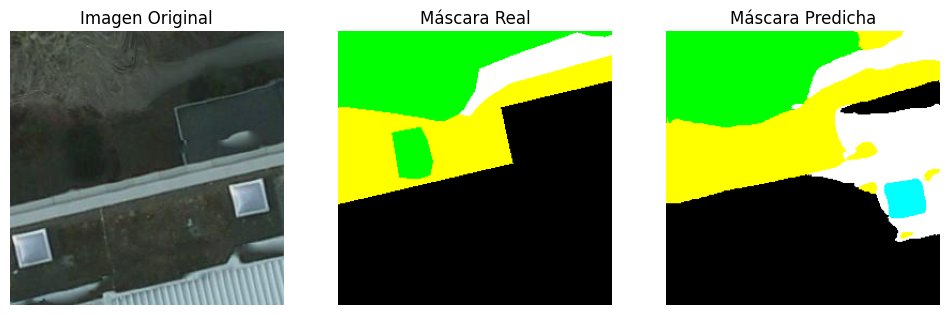

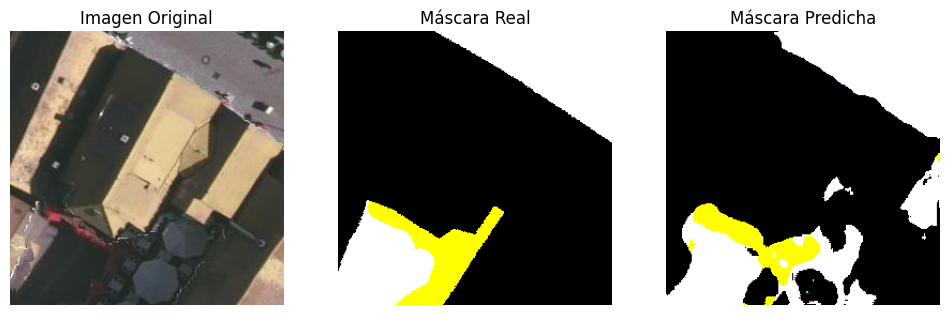

In [7]:
import matplotlib.pyplot as plt

# Definir una función para convertir etiquetas 2D a RGB
def label_to_rgb(label):
    label = label.squeeze()
    label_rgb = np.zeros((*label.shape, 3), dtype=np.uint8)
    label_rgb[label == 0] = Background
    label_rgb[label == 1] = Roads
    label_rgb[label == 2] = Building
    label_rgb[label == 3] = Low_vegetation
    label_rgb[label == 4] = Tree
    label_rgb[label == 5] = Car
    return label_rgb

PImg = X_test[:5]
Mimg = y_test[:5]

# Realizar predicciones en el conjunto de prueba
predictions = model2.predict(PImg)

# Obtener la clase con la mayor probabilidad
predicted_classes = np.argmax(predictions, axis=-1)

# Visualizar las imágenes y sus predicciones
num_images = 5  # Número de imágenes a visualizar

for i in range(num_images):
    plt.figure(figsize=(12, 4))

    # Mostrar la imagen original
    plt.subplot(1, 3, 1)
    plt.title("Imagen Original")
    plt.imshow(cv2.cvtColor(PImg[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Mostrar la máscara real
    plt.subplot(1, 3, 2)
    plt.title("Máscara Real")
    plt.imshow(label_to_rgb(Mimg[i]))
    plt.axis('off')

    # Mostrar la máscara predicha
    plt.subplot(1, 3, 3)
    plt.title("Máscara Predicha")
    plt.imshow(label_to_rgb(predicted_classes[i]))
    plt.axis('off')

    plt.show()


#SAM MODELL

Nell’aprile 2023, il dipartimento di ricerca di Meta ha presentato
un nuovo modello di intelligenza artificiale (AI) che hanno chiam-
ato SAM (Segment Anything Model). Con SAM si puo segmentare
un’immagine in tre modi: Selezionando un punto dell’immagine verra
cercato e distinto l’oggetto che si interseca con quel punto e verranno
ricercati tutti gli oggetti identici presenti nell’immagine. Delimitando
la finestra o il riquadro di delimitazione, viene disegnato un rettan
golo sull’immagine e vengono identificati tutti gli oggetti presenti in
quell’area. Per le parole, una parola viene digitata tramite una console e SAM pu`o identificare gli oggetti che corrispondono a quella
parola o all’ordine esplicito in immagini o video, anche se tali dati
non sono stati inclusi nel suo addestramento

El código verifica la versión de PyTorch y torchvision instaladas, así como la disponibilidad de CUDA para la aceleración por GPU. Luego, instala el paquete segment-anything directamente desde un repositorio de GitHub usando pip. Finalmente, descarga un archivo de pesos preentrenados necesario para el modelo de segmentación de objetos.

*Il codice controlla la versione di PyTorch e torchvision installate, e la disponibilità di CUDA per l'accelerazione GPU. Successivamente, installa il pacchetto segment-anything direttamente da un repository GitHub usando pip. Infine, scarica un file di pesi preaddestrati necessario per il modello di segmentazione degli oggetti.*

In [5]:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.3.1+cu121
Torchvision version: 0.18.1+cu121
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-dcvrx7ju
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-dcvrx7ju
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
--2024-07-23 17:24:49--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.121, 108.157.254.124, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.3’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   261MB/s    in 9.0s 

In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

La función show_anns visualiza una lista de anotaciones segmentadas en una imagen. Primero, ordena las anotaciones por área en orden descendente. Luego, crea una imagen en blanco con un canal alfa para la transparencia y superpone máscaras de segmentación sobre ella, asignando un color aleatorio y una opacidad fija a cada máscara. Finalmente, muestra la imagen resultante con las máscaras superpuestas.

*La funzione show_anns visualizza un elenco di annotazioni segmentate su un'immagine. Prima ordina le annotazioni per area in ordine decrescente. Poi crea un'immagine bianca con un canale alfa per la trasparenza e sovrappone le maschere di segmentazione, assegnando a ciascuna una colorazione casuale e un'opacità fissa. Infine, mostra l'immagine risultante con le maschere sovrapposte.*

In [6]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

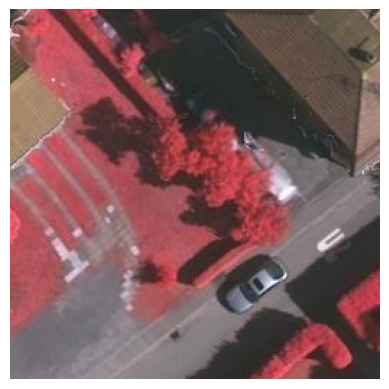

In [15]:
image = cv2.imread("/content/ImagenR/Imagenes/top_mosaic_09cm_area10_patch_0_0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

Este código configura el entorno para utilizar el modelo Segment Anything de Facebook Research. Importa las bibliotecas necesarias y añade el directorio de nivel superior al camino del sistema. Luego, carga un modelo preentrenado de Segment Anything usando un archivo de punto de control específico y lo mueve a la GPU. Finalmente, crea un generador de máscaras automáticas usando el modelo cargado.

*Questo codice configura l'ambiente per utilizzare il modello Segment Anything di Facebook Research. Importa le librerie necessarie e aggiunge la directory di livello superiore al percorso del sistema. Successivamente, carica un modello pre-addestrato di Segment Anything utilizzando un file di checkpoint specifico e lo trasferisce sulla GPU. Infine, crea un generatore di maschere automatiche utilizzando il modello caricato.*

In [17]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [18]:
masks = mask_generator.generate(image)
print(len(masks))
print(masks[0].keys())

58
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [20]:
for i, mask in enumerate(masks):
    print(f"Objeto {i+1} - Área: {mask['area']}, Bounding Box: {mask['bbox']}")

Objeto 1 - Área: 1508, Bounding Box: [0, 41, 38, 66]
Objeto 2 - Área: 4143, Bounding Box: [150, 0, 92, 102]
Objeto 3 - Área: 1172, Bounding Box: [143, 170, 48, 40]
Objeto 4 - Área: 175, Bounding Box: [0, 25, 11, 25]
Objeto 5 - Área: 2303, Bounding Box: [0, 128, 37, 98]
Objeto 6 - Área: 134, Bounding Box: [241, 0, 14, 15]
Objeto 7 - Área: 1022, Bounding Box: [226, 180, 29, 57]
Objeto 8 - Área: 187, Bounding Box: [212, 151, 19, 16]
Objeto 9 - Área: 1337, Bounding Box: [208, 0, 47, 42]
Objeto 10 - Área: 568, Bounding Box: [116, 158, 43, 32]
Objeto 11 - Área: 1870, Bounding Box: [122, 207, 82, 48]
Objeto 12 - Área: 70, Bounding Box: [248, 1, 7, 14]
Objeto 13 - Área: 1718, Bounding Box: [0, 0, 38, 107]
Objeto 14 - Área: 134, Bounding Box: [0, 137, 7, 25]
Objeto 15 - Área: 1191, Bounding Box: [165, 217, 71, 38]
Objeto 16 - Área: 1022, Bounding Box: [239, 36, 16, 78]
Objeto 17 - Área: 31, Bounding Box: [66, 135, 5, 6]
Objeto 18 - Área: 334, Bounding Box: [242, 205, 13, 30]
Objeto 19 - Área: 2

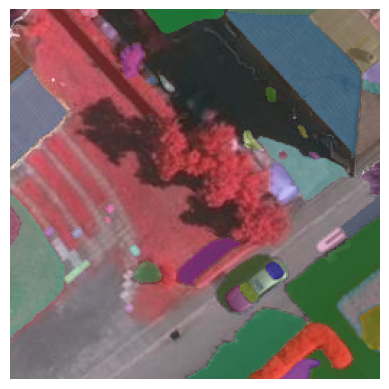

In [19]:
plt.figure()
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

Fine-Tunning

#Fine-Tunning
En este código, se configura un generador de máscaras mask_generator_2 con parámetros específicos para optimizar la segmentación de imágenes. Los parámetros incluyen points_per_side=32, que define la resolución de las regiones de interés; pred_iou_thresh=0.86, que establece el umbral mínimo para la puntuación de superposición de la máscara; stability_score_thresh=0.92, que define el umbral para la estabilidad de la máscara; crop_n_layers=1, que especifica el número de capas de recorte en la imagen; crop_n_points_downscale_factor=2, que reduce la cantidad de puntos para el recorte; y min_mask_region_area=100, que requiere una post-elaborazione con OpenCV para filtrar las máscaras pequeñas. Luego, se generan y visualizan las máscaras segmentadas en la imagen original.

Nel codice, viene configurato un generatore di maschere mask_generator_2 con parametri specifici per ottimizzare la segmentazione delle immagini. I parametri includono points_per_side=32, che definisce la risoluzione delle aree di interesse; pred_iou_thresh=0.86, che stabilisce la soglia minima per il punteggio di sovrapposizione della maschera; stability_score_thresh=0.92, che definisce la soglia per la stabilità della maschera; crop_n_layers=1, che specifica il numero di strati di ritaglio nell'immagine; crop_n_points_downscale_factor=2, che riduce il numero di punti per il ritaglio; e min_mask_region_area=100, che richiede una post-elaborazione con OpenCV per filtrare le maschere piccole. Successivamente, vengono generate e visualizzate le maschere segmentate sull'immagine originale.

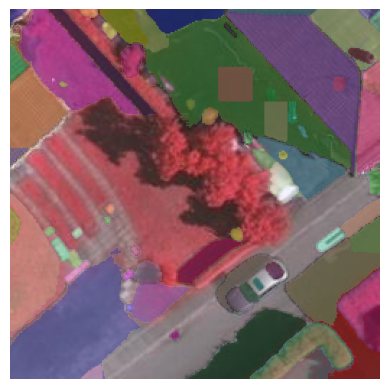

In [21]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(image)
len(masks2)

plt.figure()
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()